In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
data = pd.read_csv('HIGGS_100k.csv', header = None)

# Visualizar as primeiras linhas do dataset
print(data.head())

print(data.info())

    0         1         2         3         4         5         6         7   \
0  1.0  0.869293 -0.635082  0.225690  0.327470 -0.689993  0.754202 -0.248573   
1  1.0  0.907542  0.329147  0.359412  1.497970 -0.313010  1.095531 -0.557525   
2  1.0  0.798835  1.470639 -1.635975  0.453773  0.425629  1.104875  1.282322   
3  0.0  1.344385 -0.876626  0.935913  1.992050  0.882454  1.786066 -1.646778   
4  1.0  1.105009  0.321356  1.522401  0.882808 -1.205349  0.681466 -1.070464   

         8         9   ...        19        20        21        22        23  \
0 -1.092064  0.000000  ... -0.010455 -0.045767  3.101961  1.353760  0.979563   
1 -1.588230  2.173076  ... -1.138930 -0.000819  0.000000  0.302220  0.833048   
2  1.381664  0.000000  ...  1.128848  0.900461  0.000000  0.909753  1.108330   
3 -0.942383  0.000000  ... -0.678379 -1.360356  0.000000  0.946652  1.028704   
4 -0.921871  0.000000  ... -0.373566  0.113041  0.000000  0.755856  1.361057   

         24        25        26       

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Separar os rótulos (primeira coluna) e os dados (restantes)
X = data.iloc[:, 1:22].values  # Usar apenas as 21 low-level features
y = data.iloc[:, 0].values

# Normalizar os dados
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjunto de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Definir a estrutura da rede neural
model = Sequential()
model.add(Dense(64, input_dim=21, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


c:\Users\Gustavo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer= optimizer, loss = "MSE" , metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size = 100)


Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6204 - loss: 0.2269 - val_accuracy: 0.6255 - val_loss: 0.2258
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6247 - loss: 0.2257 - val_accuracy: 0.6286 - val_loss: 0.2254
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6253 - loss: 0.2254 - val_accuracy: 0.6309 - val_loss: 0.2245
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6235 - loss: 0.2253 - val_accuracy: 0.6269 - val_loss: 0.2252
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6287 - loss: 0.2252 - val_accuracy: 0.6309 - val_loss: 0.2242
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6315 - loss: 0.2240 - val_accuracy: 0.6250 - val_loss: 0.2252
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6301 - loss: 0.2243 - val_accuracy: 0.6306 - val_loss: 0.2238
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6305 - loss: 0.2237 - val_accuracy: 0.

626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.6356 - loss: 0.2224


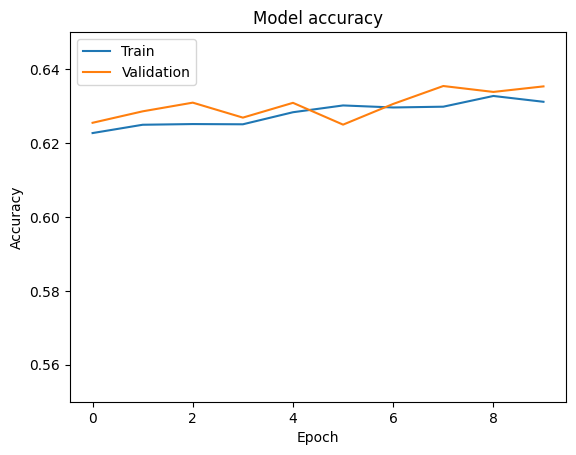

626/626 ━━━━━━━━━━━━━━━━━━━━ 1s 755us/step
              precision    recall  f1-score   support

         0.0       0.63      0.56      0.59      9429
         1.0       0.64      0.70      0.67     10572

    accuracy                           0.64     20001
   macro avg       0.63      0.63      0.63     20001
weighted avg       0.63      0.64      0.63     20001



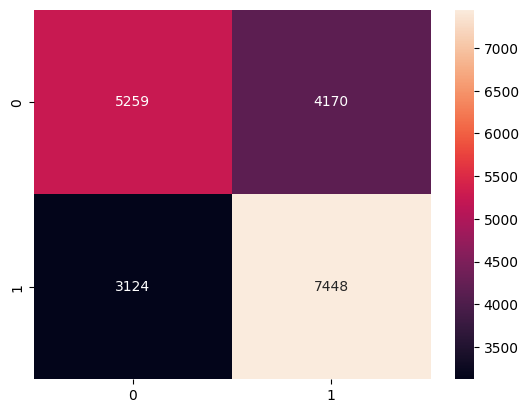

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Avaliar o modelo nos dados de validação
val_loss, val_accuracy = model.evaluate(X_val, y_val)

# Visualizar as métricas de treinamento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.ylim(0.55, 0.65)
plt.show()

# Calcular e imprimir o relatório de classificação
y_pred = (model.predict(X_val) > 0.5).astype("int32")
print(classification_report(y_val, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


In [ ]:
# Verifique se a coluna 'm_wwbb' existe
if 'm_wwbb' in data.columns:
    # Obter o espectro de massa m_wwbb para as partículas identificadas como sinal e fundo
    m_wwbb_signal = data.loc[y_pred[:, 0] == 1, 'm_wwbb']
    m_wwbb_background = data.loc[y_pred[:, 0] == 0, 'm_wwbb']

    # Histograma para o espectro de massa m_wwbb
    plt.hist(m_wwbb_signal, bins=50, alpha=0.5, label='Signal')
    plt.hist(m_wwbb_background, bins=50, alpha=0.5, label='Background')
    plt.xlabel('m_wwbb')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

    # Histograma para os valores originalmente rotulados
    m_wwbb_signal_original = data.loc[data['class'] == 1, 'm_wwbb']
    m_wwbb_background_original = data.loc[data['class'] == 0, 'm_wwbb']

    plt.hist(m_wwbb_signal_original, bins=50, alpha=0.5, label='Original Signal')
    plt.hist(m_wwbb_background_original, bins=50, alpha=0.5, label='Original Background')
    plt.xlabel('m_wwbb')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()
else:
    print("Coluna 'm_wwbb' não encontrada no dataset.")
